In [1]:
import pandas as pd                                  # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np                                   # numpy is used to calculate the mean and standard deviation

import matplotlib.pyplot as plt                      # matplotlib is for drawing graphs
%matplotlib inline
import matplotlib.colors as colors
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('processed.cleveland.data')
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
df = pd.read_csv('processed.cleveland.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'target']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.shape

(303, 14)

In [7]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [8]:
len(df_no_missing)

297

In [9]:
# Number of people has Heart-attack according gender & age
df_Gender_Age = df.groupby(['sex','age'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Gender_Age.head(10).style.background_gradient(cmap='coolwarm')

,sex,age,target
59,1.000000,58.000000,13
58,1.000000,57.000000,13
60,1.000000,59.000000,13
53,1.000000,52.000000,12
55,1.000000,54.000000,11
45,1.000000,44.000000,9
57,1.000000,56.000000,8
52,1.000000,51.000000,8
65,1.000000,64.000000,7
24,0.000000,62.000000,7


1:Male

0:Female

top 10 count of heart attack, males have witnessed more heart attacks for their ages.

In [10]:
# Number of people has heart-attack according to chest-pain & Gender
df_pain_gender = df.groupby(['sex','cp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_pain_gender.head(10).style.background_gradient(cmap='Blues')

,sex,cp,target
7,1.000000,4.000000,104
6,1.000000,3.000000,51
3,0.000000,4.000000,40
2,0.000000,3.000000,35
5,1.000000,2.000000,32
4,1.000000,1.000000,19
1,0.000000,2.000000,18
0,0.000000,1.000000,4


- The higher the number, the lesser are the odds of heart attack

- shows that large number of Male has Heart_Attack with Chest_pain less

- just 19 Man has Heart_Attack with Chest_pain higher

- for women 4 women has Heart_Attack with Chest_pain higher

- 39 women has Heart_Attack with Chest_pain less

In [11]:
# Number of people have heart-attack according Gender & Resting_blood_pressure
df_Sex_Restbp = df.groupby(['sex','restbp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Restbp.head(10).style.background_gradient(cmap='coolwarm')

,sex,restbp,target
47,1.000000,120.000000,27
55,1.000000,130.000000,24
61,1.000000,140.000000,22
41,1.000000,110.000000,16
15,0.000000,130.000000,12
51,1.000000,125.000000,11
10,0.000000,120.000000,10
67,1.000000,150.000000,10
21,0.000000,140.000000,10
53,1.000000,128.000000,9


- count of Male 16 has Resting_blood_pressure 110 but count of women 12 has Resting_blood_pressure 130

In [12]:
# Number of people have Heart-attack according Cholesterol & Gender
df_Sex_Chole = df.groupby(['sex','chol'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Chole.head(10).style.background_gradient(cmap='OrRd')

,sex,chol,target
115,1.000000,212.000000,5
172,1.000000,282.000000,4
109,1.000000,204.000000,4
48,0.000000,269.000000,4
135,1.000000,234.000000,4
134,1.000000,233.000000,4
150,1.000000,254.000000,4
141,1.000000,243.000000,3
140,1.000000,240.000000,3
139,1.000000,239.000000,3


- count of Male with high Cholesterol less (212 -5)

- for female Cholesterol was high and count of persone has Heart_attack is smaller

In [13]:
# Number of people has Heart-attack according Fasting_blood_sugar and Gender
df_Sex_fbs = df.groupby(['sex','fbs'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_fbs.style.background_gradient(cmap='viridis')

,sex,fbs,target
2,1.000000,0.000000,173
0,0.000000,0.000000,85
3,1.000000,1.000000,33
1,0.000000,1.000000,12


- When Fasting_blood_sugar was False --Heart_attack was highe for Male also with women

In [14]:
# Number of people has Heart-attack according to ECG_results and Gender
df_Sex_ECG = df.groupby(['sex','restecg'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_ECG.style.background_gradient(cmap='viridis')

,sex,restecg,target
5,1.000000,2.000000,103
3,1.000000,0.000000,102
0,0.000000,0.000000,49
2,0.000000,2.000000,45
1,0.000000,1.000000,3
4,1.000000,1.000000,1


In [15]:
# Number people has Heart-attack according to Maximum_heart_rate and Gender
df_Sex_Max = df.groupby(['sex','thalach'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Max.head(10).style.background_gradient(cmap='summer')

,sex,thalach,target
77,1.000000,132.000000,7
86,1.000000,144.000000,7
103,1.000000,162.000000,7
97,1.000000,156.000000,6
113,1.000000,173.000000,6
42,0.000000,172.000000,6
82,1.000000,140.000000,6
91,1.000000,150.000000,6
70,1.000000,125.000000,6
85,1.000000,143.000000,5


In [16]:
# Number of people has Heart_attack according to Exercise_induced_angina and Gender
df_Sex_Excer = df.groupby(['sex','exang'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Excer.style.background_gradient(cmap='cool')

,sex,exang,target
2,1.000000,0.000000,129
3,1.000000,1.000000,77
0,0.000000,0.000000,75
1,0.000000,1.000000,22


- Exercise induced chest pain was higher in males and more resulted in Heart attacks.

In [17]:
# Number of people has Heart_attack according his ST_depression and Gender
df_Sex_depression = df.groupby(['sex','oldpeak'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_depression.head(10).style.background_gradient(cmap='Oranges')

,sex,oldpeak,target
27,1.000000,0.000000,63
0,0.000000,0.000000,36
37,1.000000,1.200000,13
34,1.000000,0.800000,10
36,1.000000,1.000000,9
41,1.000000,1.800000,8
38,1.000000,1.400000,8
33,1.000000,0.600000,8
43,1.000000,2.000000,7
40,1.000000,1.600000,7


- The lower the depression, the higher the cases were for heart attack.

In [18]:
# Number of people has Heart_attack according to slope and Gender
df_Sex_Slope = df.groupby(['sex','slope'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Slope.head(10).style.background_gradient(cmap='afmhot')

,sex,slope,target
3,1.000000,1.000000,95
4,1.000000,2.000000,95
0,0.000000,1.000000,47
1,0.000000,2.000000,45
5,1.000000,3.000000,16
2,0.000000,3.000000,5


- The lower ST_slope (2 less than 1 less than 0), the higher the cases were for heart attack.

- The higher the slope value, the higher were the cases for Heart attack

In [19]:
# Number of people has Heart_attack according to Major_vessels and Gender
df_Sex_Vessels = df.groupby(['sex','ca'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_Vessels.head(10).style.background_gradient(cmap='viridis')

,sex,ca,target
4,1.000000,0.0,111
0,0.000000,0.0,65
5,1.000000,1.0,50
6,1.000000,2.0,25
7,1.000000,3.0,16
1,0.000000,1.0,15
2,0.000000,2.0,13
3,0.000000,3.0,4
8,1.000000,?,4


- The lower the number of vessels blocked, the higher were the heart attack cases.

- This means that 0 represents that all 4 major blood vessels were blocked and 4 represented all vessels were free for flow.

- Male > Female

In [20]:
# Number of people has Heart_attack according to Thalassemia_types and Gender
df_Sex_thal = df.groupby(['sex','thal'])['target'].count().reset_index().sort_values(by='target',ascending=False)
df_Sex_thal.head(20).style.background_gradient(cmap='GnBu')

,sex,thal,target
6,1.000000,7.0,102
4,1.000000,3.0,86
0,0.000000,3.0,80
5,1.000000,6.0,17
2,0.000000,7.0,15
1,0.000000,6.0,1
3,0.000000,?,1
7,1.000000,?,1


- The higher the Thalassemia type, the higher were the cases of heart attack.

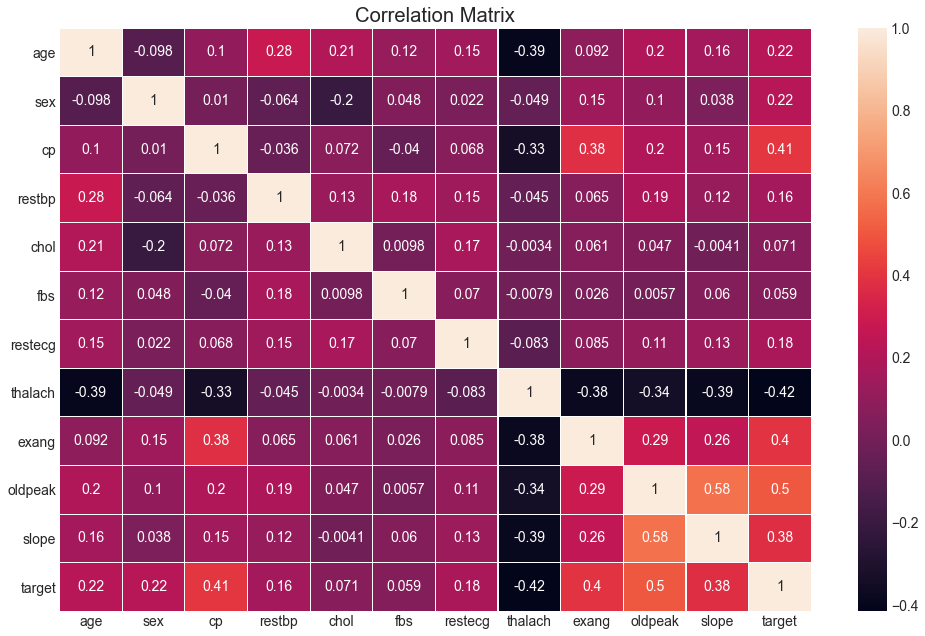

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2g', linewidth=0.2)
plt.title("Correlation Matrix")
plt.show()

## Correlation

In [22]:
df.corr()['target'].sort_values(ascending=False)

target     1.000000
oldpeak    0.504092
cp         0.407075
exang      0.397057
slope      0.377957
sex        0.224469
age        0.222853
restecg    0.183696
restbp     0.157754
chol       0.070909
fbs        0.059186
thalach   -0.415040
Name: target, dtype: float64

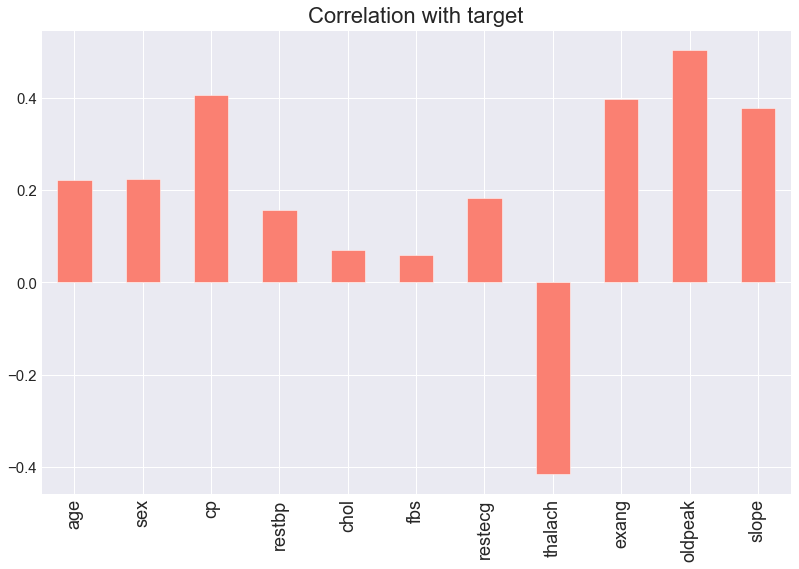

In [23]:
a = df.drop('target', axis=1)
a.corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), color=['salmon'])

plt.title("Correlation with target", size=22)
plt.xticks(size=18)
plt.yticks(size=15)
plt.show()

- **chol and fbs** are **very least** correlated with target

<h2 style=color:green align="left"> c. Find Outliers </h2>

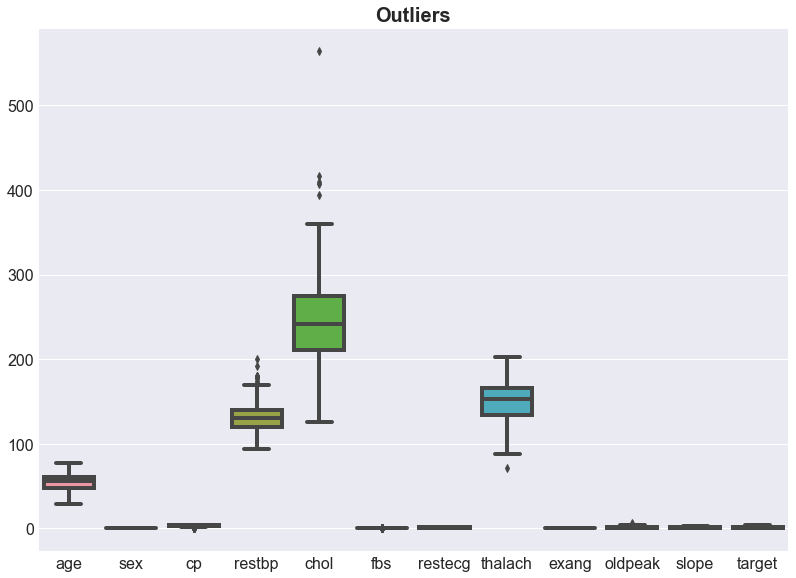

In [24]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df)

plt.title("Outliers", fontsize=20, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

<h2 style=color:green align="left"> d. Skew and Kurtosis </h2>

In [25]:
df.skew()

age       -0.209060
sex       -0.774935
cp        -0.841754
restbp     0.706035
chol       1.135503
fbs        1.986652
restecg    0.019900
thalach   -0.537449
exang      0.742532
oldpeak    1.269720
slope      0.508316
target     1.058496
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:1.1355031533363453')

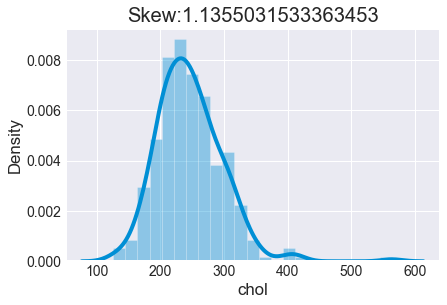

In [26]:
sns.distplot(df['chol'])
Skew_chol = df['chol'].skew()
plt.title("Skew:"+str(Skew_chol))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:0.7060346498131783')

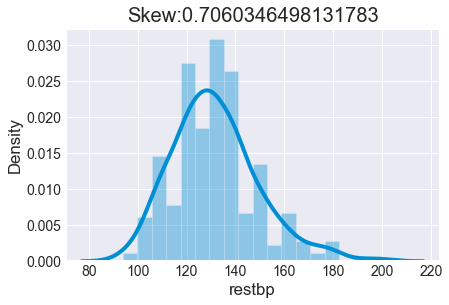

In [27]:
sns.distplot(df['restbp'])
Skew_restbp = df['restbp'].skew()
plt.title("Skew:"+str(Skew_restbp))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:1.9866519309144517')

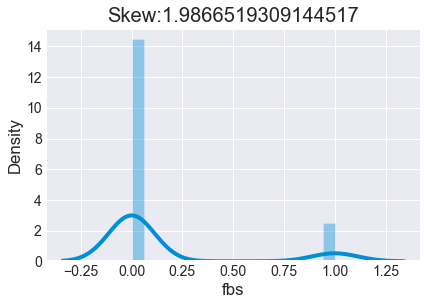

In [28]:
sns.distplot(df['fbs'])
Skew_fbs = df['fbs'].skew()
plt.title("Skew:"+str(Skew_fbs))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:-0.8417538756970184')

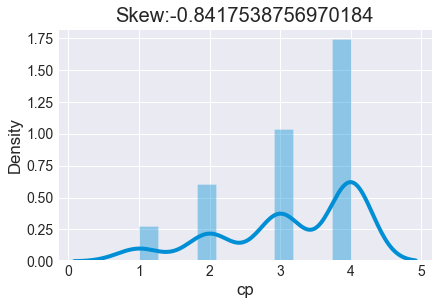

In [29]:
sns.distplot(df['cp'])
Skew_cp = df['cp'].skew()
plt.title("Skew:"+str(Skew_cp))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Skew:1.2697199306019966')

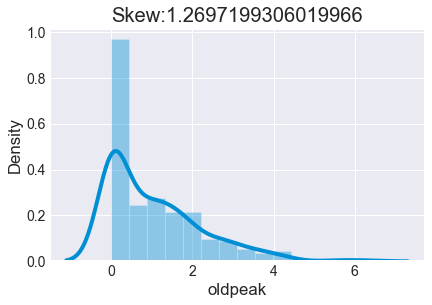

In [30]:
sns.distplot(df['oldpeak'])
Skew_oldpeak = df['oldpeak'].skew()
plt.title("Skew:"+str(Skew_oldpeak))